# Hypothesis Testing

* $H_0$ = `Null` = default, no change
* $H_1$ = $H_a$ = `Alternative`
* 1 - $\alpha$ = `Confidence Interval`, True Pos = 95%, 99% and 99.9%
* $\alpha$ = Significance, `False Pos` rate = P(FP)=P(Type I Error)
* 1 - $\beta$ = `Statistical Power`, True Neg = P(Reject $H_0$ when $H_0$ is false)
* $\beta$ = `False Neg` rate = P(FN)=P(Type II Error)
* $p$ = `p-value` = P(observed by chance | $H_0$ is true)

#### Examples
* $H_0$ : There is no difference in right-handed people and left-handed individual's heights.
* $H_a$ : There is a difference in right-handed people and left-handed individual's heights.

* $H_0$ : The amount of sleep a student gets the night before an exam makes no difference on the student's exam score.
* $H_a$ : Less sleep the night before an exam leads to a lower exam score.

* $H_0$ : There is no difference in grade for coffee and non-coffee drinkers.
* $H_a$ : Coffee drinkers have higher grades than non-coffee drinkers.

## Overview Exercises
- $H_0$
- $H_a$
- 1 - $\alpha$
- 1 - $\beta$
- $\alpha$
- $\beta$

#### Has the network latency gone up since we switched internet service providers?
- $H_0$ = Network latency has NOT gone up since we switched ISPs
- $H_a$ = Network latency HAS gone up since we switched ISPs
- 1 - $\alpha$ = Latency roughly same from old latency (lot of overlap)
- 1 - $\beta$ = Latency definitely higher than old latency (very little overlap)
- $\alpha$ = Latency roughly same as old but someone complains
- $\beta$ = Latency definitely more than old but no complaints

#### Is the website redesign any good?
- $H_0$ = Website redesign made no change
- $H_a$ = Website redesign was better
- 1 - $\alpha$ = Website visits the same
- 1 - $\beta$ = Website visits increased
- $\alpha$ = Website usability is better but visits the same
- $\beta$ = Website usability is bad but visits increased

#### Is our television ad driving more sales?
- $H_0$ = TV ad not driving more sales
- $H_a$ = TV ad driving more sales
- 1 - $\alpha$ = Sales roughly the same
- 1 - $\beta$ = Sales increased
- $\alpha$ = Same sales but ad watched a lot
- $\beta$ = More sales but ad not watched a lot

## Comparison of Means Exercises
- A. Plot Distribution
- B. Set Hypothesis 
    - $H_0$ & $H_a$
- C. Set Alpha (ex: $\alpha$ = .05)
- D. Verify Assumptions
    - sample size
    - normal dist
    - independent samples (n/a for 1-sample)
    - equal variances (`np.var()`; `equal_var=False` if not)
        - `scipy.stats.levene(`sample_1, sample_2, ... sample_n`)`
- E. Compute test statistic (t-stat) & p-value
    - `ttest_1samp(`sample_mean, overall_mean`)`
        - `wilcoxon(`sample`)`
    - `ttest_ind(`sample_1, sample_2, `equal_var=`True/False`)`
        - `mannwhitneyu(`sample_1, sample_2`)`
    - `f_oneway(`sample_1, sample_2, ... sample_n`)`
        - `kruskal(`sample_n`)`
- F. Decide
    - p < $\alpha$ for 2-tail
    - p/2 < $\alpha$ for 1-tail
    - t > 0 & t < 0 for greater/less than

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pydataset import data
rng = np.random.default_rng(42)

1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?


In [2]:
# 1-sample
# 2-tail
# ttest_1samp or wilcoxon

- Are adults who drink milk taller than adults who don't drink milk?


In [3]:
# 2-sample
# 1-tail greater
# ttest_ind or mannwhitneyu

- Is the the price of gas higher in texas or in new mexico?


In [4]:
# 2-sample
# 1-tail greater
# ttest_ind or mannwhitneyu

- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [5]:
# 3-sample
# 2-tail
# f_oneway or kruskal

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [6]:
# 2-sample
# 2-tail

office_1 = stats.norm(90,15).rvs(40)
office_2 = stats.norm(100,20).rvs(50)
alpha = .05

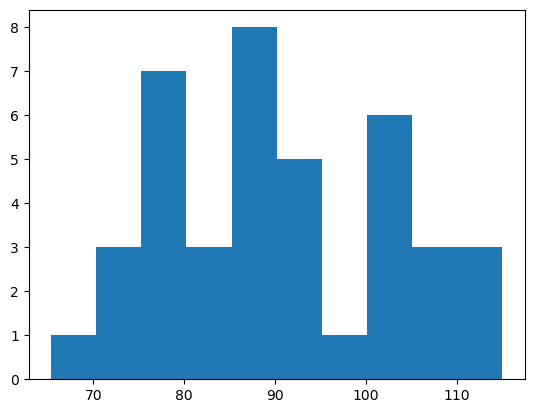

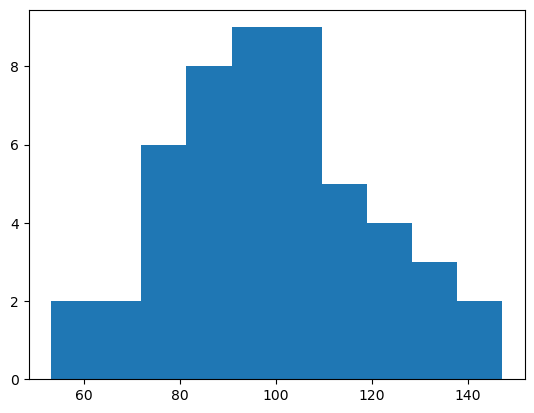

In [7]:
# plot dist
plt.hist(office_1)
plt.show()
plt.hist(office_2)
plt.show()

In [8]:
# hypothesis
# H0 = no diff in avg time to sell homes between offices
# Ha = yes diff in avg time to dell homes between offices

In [9]:
# verify
t, p = stats.levene(office_1,office_2)
t, p

(8.438786719693377, 0.004644273066481312)

In [10]:
# compute
t,p = stats.ttest_ind(office_1, office_2)
t,p

(-2.0415393951433, 0.044192009011641664)

In [11]:
# decide
print("Reject H0? ", p < alpha)

Reject H0?  True


3. Load the `mpg` dataset and use it to answer the following questions:

In [22]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [23]:
# 2-sample, 2-tail
mpg['fe'] = (mpg.cty + mpg.hwy)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [14]:
o8 = mpg.fe[mpg.year==2008]
ninety9 = mpg.fe[mpg.year==1999]
o8.shape, ninety9.shape

((117,), (117,))

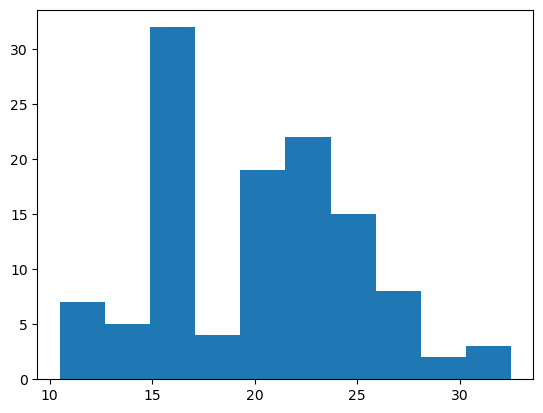

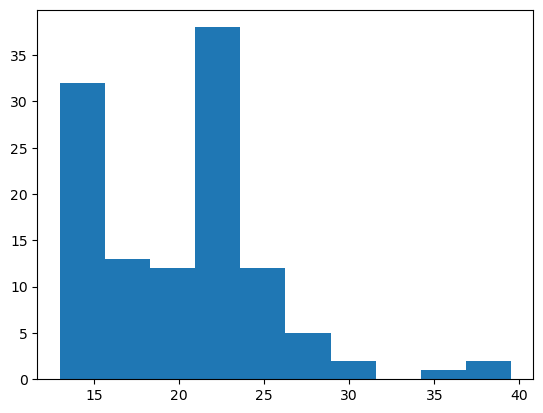

In [15]:
# dist
plt.hist(o8)
plt.show()
plt.hist(ninety9)
plt.show()

In [16]:
# H0 = 2008 fe = 1999 fe
# Ha = 2008 fe != 1999 fe
# alpha already 0.05

In [17]:
# verify
t, p = stats.levene(o8,ninety9)
t, p

(0.033228136671080453, 0.855517569468803)

In [18]:
# compute
t, p = stats.ttest_ind(o8,ninety9)
t, p

(-0.21960177245940962, 0.8263744040323578)

In [19]:
# decide
print("Reject H0? ", p < alpha)

Reject H0?  False


- Are compact cars more fuel-efficient than the average car?


In [20]:
# 1-sample, 1-tail greater
cc = mpg.fe[mpg['class']=='compact']
mpg_fe = mpg.fe
mpg_fe_avg = mpg.fe.mean()

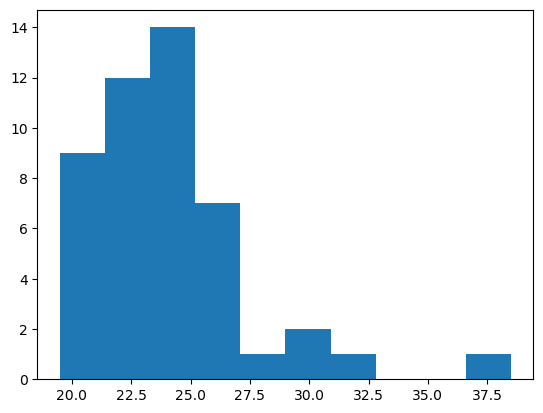

In [21]:
# dist
plt.hist(cc)
plt.show()

In [22]:
# H0 = compact fe <= all fe
# Ha = compact fe > all fe
# alpha already 0.05

In [23]:
# verify
cc.shape

(47,)

In [24]:
# compute
t, p = stats.ttest_1samp(cc,mpg_fe_avg)
t, p/2

(7.896888573132533, 2.0992818971585743e-10)

In [25]:
# decide
if t>0 and (p/2)<alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")

Reject H0


- Do manual cars get better gas mileage than automatic cars?

In [24]:
# 2-sample, 1-tail manual>auto
mpg['auto'] = np.where(mpg['trans'].str.contains('auto'),'auto','manual')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fe,auto
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,auto


In [27]:
auto = mpg.fe[mpg.auto=='auto']
manual = mpg.fe[mpg.auto=='manual']
auto.shape, manual.shape

((157,), (77,))

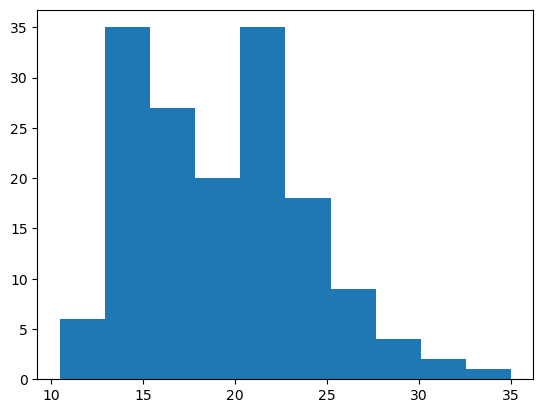

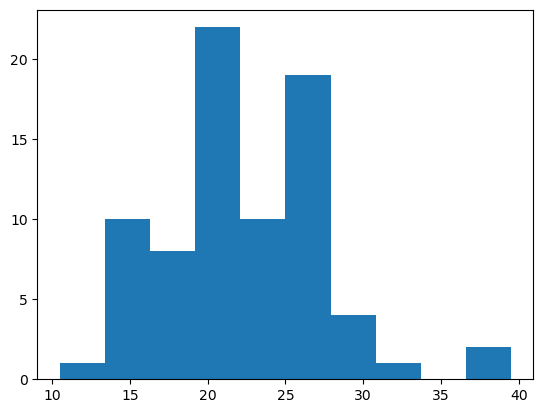

In [28]:
# dist
plt.hist(auto)
plt.show()
plt.hist(manual)
plt.show()

In [29]:
# H0 = manual fe <= auto fe
# Ha = manual fe > auto fe
# alpha same .05

In [30]:
# verify
t,p = stats.levene(manual, auto)
t,p

(0.20075824847529639, 0.6545276355131857)

In [31]:
# compute
t,p = stats.ttest_ind(manual, auto)
t,p/2

(4.593437735750014, 3.5771872005728424e-06)

In [32]:
# decide
if t>0 and (p/2)<alpha:
    print('Reject H0')
else:
    print('Failed to reject H0')

Reject H0


## Correlation Exercises

- `stats.pearsonr(`continuous_1,continuous_2`)`
- r = parametric linear relation 0 to 1
- `stats.spearmanr(`continuous_1,continuous_2`)`
- r = non-parametric linear relation 0 to 1

Answer with the type of stats test you would use (assume normal distribution):


- Is there a relationship between the length of your arm and the length of your foot?


In [33]:
# relation
# pearson r

- Do guys and gals quit their jobs at the same rate?


In [34]:
# 2-samples, 2-tail
# ttest_ind

- Does the length of time of the lecture correlate with a students grade?

In [35]:
# relation
# pearson r

Use the `telco_churn` data.

In [32]:
from env import get_db_url

In [75]:
churn = pd.read_sql('select * from customers',get_db_url('telco_churn'))
churn.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [77]:
churn.total_charges[churn.total_charges==' ']=0
churn.total_charges = churn.total_charges.astype(float)
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

/var/folders/ml/8_q6055n29vf0c36kmj6w1900000gn/T/ipykernel_11130/203688212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn.total_charges[churn.total_charges==' ']=0


In [39]:
# Does tenure correlate with monthly charges?
# H0 = No linear relation
# Ha = Yes linear relation
alpha = .05


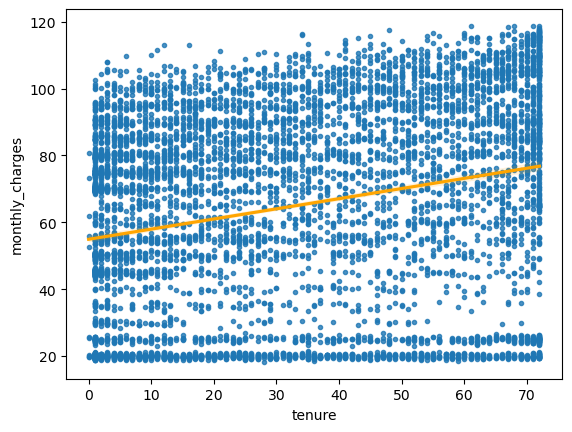

In [66]:
sns.regplot(data=churn,x=churn.tenure,y=churn.monthly_charges,marker='.',line_kws={'color':'orange'})
plt.show()

In [78]:
r, p = stats.pearsonr(churn.tenure,churn.monthly_charges)
r, p

(0.24789985628615246, 4.094044991483017e-99)

In [79]:
r, p = stats.spearmanr(churn.tenure,churn.monthly_charges)
r, p

(0.27641678933130215, 1.0271266876409408e-123)

In [42]:
# Total charges?
# H0 = No linear relation
# Ha = Yes linear relation
# alpha = .05

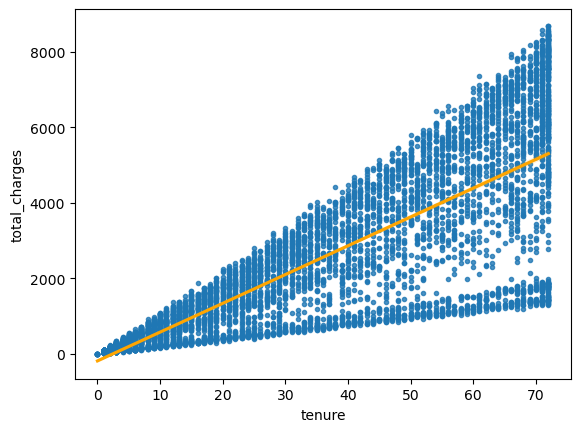

In [67]:
sns.regplot(data=churn,x=churn.tenure,y=churn.total_charges,marker='.',line_kws={'color':'orange'})
plt.show()

In [44]:
r, p = stats.pearsonr(churn.tenure,churn.total_charges)
r, p

(0.8261783979502481, 0.0)

In [80]:
r, p = stats.spearmanr(churn.tenure,churn.total_charges)
r, p

(0.8896957900597577, 0.0)

In [45]:
# What happens if you control for phone and internet service?
# H0 = No linear relation
# Ha = Yes linear relation
# alpha = .05

In [46]:
churn.phone_service.value_counts()


Yes    6361
No      682
Name: phone_service, dtype: int64

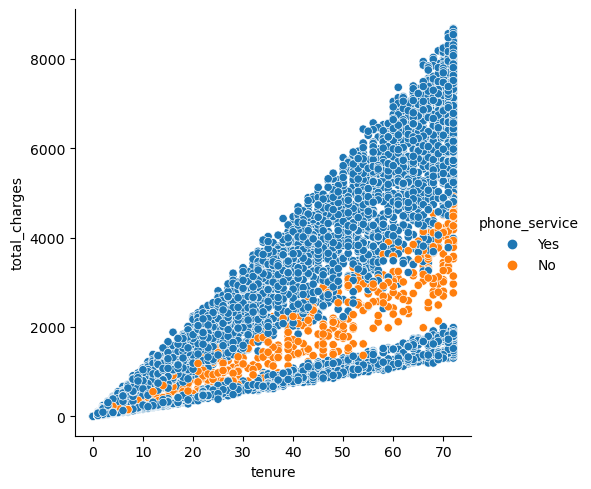

In [70]:
sns.relplot(data=churn, x=churn.tenure, y=churn.total_charges, hue=churn.phone_service)
plt.show()

In [48]:
no_phone = churn[churn.phone_service=='No']
yes_phone = churn[churn.phone_service=='Yes']

In [49]:
no_r, no_p = stats.pearsonr(no_phone.tenure, no_phone.total_charges)
no_r, no_p

(0.9535697728407466, 0.0)

In [81]:
no_r, no_p = stats.spearmanr(no_phone.tenure, no_phone.total_charges)
no_r, no_p

(0.9794110522550499, 0.0)

In [50]:
yes_r, yes_p = stats.pearsonr(yes_phone.tenure, yes_phone.total_charges)
yes_r, yes_p

(0.8301076972900466, 0.0)

In [82]:
yes_r, yes_p = stats.spearmanr(yes_phone.tenure, yes_phone.total_charges)
yes_r, yes_p

(0.8866128497089706, 0.0)

In [51]:
churn.internet_service_type_id.value_counts()

2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64

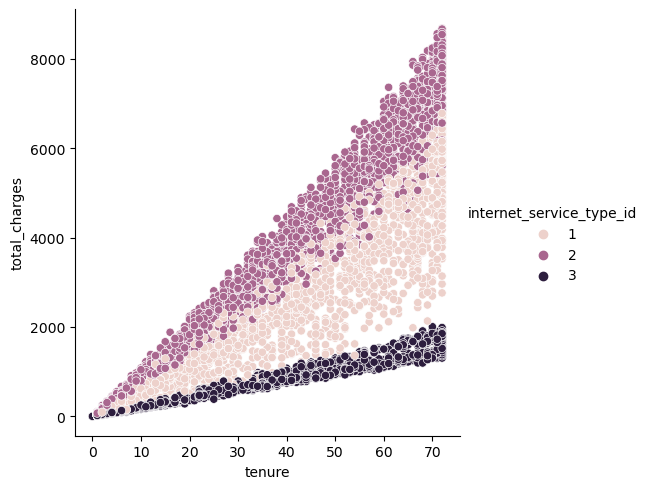

In [52]:
sns.relplot(data=churn, x=churn.tenure, y=churn.total_charges, hue=churn.internet_service_type_id)
plt.show()

In [53]:
no_internet = churn[churn.internet_service_type_id==3]
fi_internet = churn[churn.internet_service_type_id==2]
dsl_internet = churn[churn.internet_service_type_id==1]

In [54]:
ni_r, ni_p = stats.pearsonr(no_internet.tenure, no_internet.total_charges)
ni_r, ni_p

(0.9815669784401064, 0.0)

In [83]:
ni_r, ni_p = stats.spearmanr(no_internet.tenure, no_internet.total_charges)
ni_r, ni_p

(0.9904730152606449, 0.0)

In [55]:
fi_r, fi_p = stats.pearsonr(fi_internet.tenure, fi_internet.total_charges)
fi_r, fi_p

(0.9853093528070621, 0.0)

In [84]:
fi_r, fi_p = stats.spearmanr(fi_internet.tenure, fi_internet.total_charges)
fi_r, fi_p

(0.9910979584930487, 0.0)

In [56]:
dsl_r, dsl_p = stats.pearsonr(dsl_internet.tenure, dsl_internet.total_charges)
dsl_r, dsl_p

(0.9413276892816262, 0.0)

In [85]:
dsl_r, dsl_p = stats.spearmanr(dsl_internet.tenure, dsl_internet.total_charges)
dsl_r, dsl_p

(0.9711479815136296, 0.0)

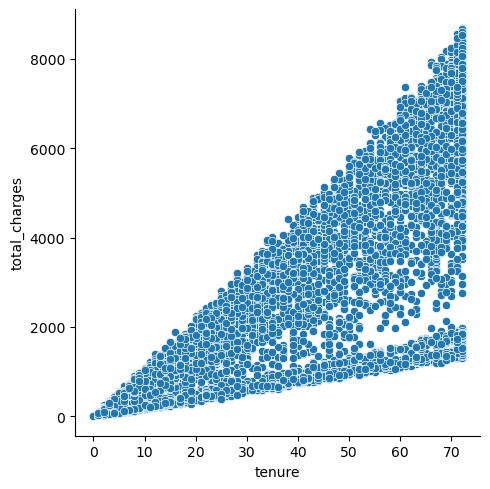

In [86]:
sns.relplot(data=churn[(churn.internet_service_type_id<3)&(churn.phone_service=='Yes')], x=churn.tenure, y=churn.total_charges)
plt.show()

In [88]:
r,p = stats.pearsonr(churn.tenure[(churn.internet_service_type_id<3)&(churn.phone_service=='Yes')],churn.total_charges[(churn.internet_service_type_id<3)&(churn.phone_service=='Yes')])
r,p

(0.9579592038044639, 0.0)

In [89]:
r,p = stats.spearmanr(churn.tenure[(churn.internet_service_type_id<3)&(churn.phone_service=='Yes')],churn.total_charges[(churn.internet_service_type_id<3)&(churn.phone_service=='Yes')])
r,p

(0.9746954303655542, 0.0)

Use the `employees` database.


In [57]:
emp_sal = pd.read_sql('''
select emp_no, salary
, datediff(salaries.from_date,hire_date) as s_dd
from employees
join salaries using(emp_no) 
''', get_db_url('employees'))
emp_sal.sample(5)

,emp_no,salary,s_dd
1508336,258911,78804,3285
321203,43893,57665,2190
965019,201521,54448,1095
2060875,417294,72961,3783
198221,30843,70797,4038


In [58]:
emp_ttl = pd.read_sql('''
select emp_no, count(title) as titles, datediff(max(from_date),hire_date) as t_dd
from employees
join titles using(emp_no)
group by emp_no
''', get_db_url('employees'))
emp_ttl.sample(5)

,emp_no,titles,t_dd
80505,90506,1,452
295592,495568,2,1826
29272,39273,2,2922
145491,245467,2,2191
201997,401973,2,1826


- Is there a relationship between how long an employee has been with the company and their salary?

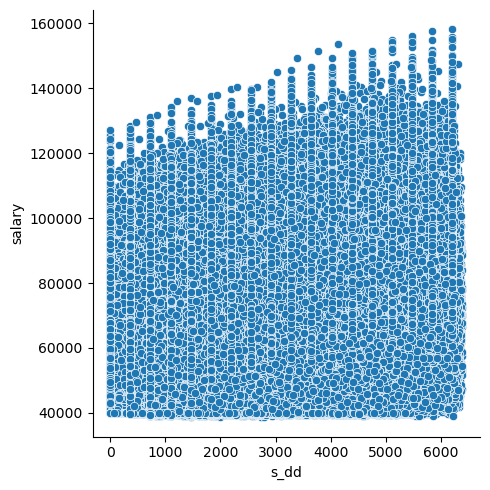

In [74]:
sns.relplot(data=emp_sal, x=emp_sal.s_dd, y=emp_sal.salary)
plt.show()

In [59]:
r,p = stats.pearsonr(emp_sal.s_dd, emp_sal.salary)
r,p

(0.3832578623338594, 0.0)

In [90]:
r,p = stats.spearmanr(emp_sal.s_dd, emp_sal.salary)
r,p

(0.3975545800263211, 0.0)

In [95]:
emp_sal2 = (emp_sal.groupby('emp_no').max('s_dd')).reset_index()
emp_sal2

,emp_no,salary,s_dd
0,10001,88958,5840
1,10002,72527,5733
2,10003,43699,5574
3,10004,74057,5475
4,10005,94692,4380
...,...,...,...
300019,499995,52868,3427
300020,499996,69501,4245
300021,499997,83441,5606
300022,499998,55003,2995


In [96]:
r,p = stats.pearsonr(emp_sal2.s_dd,emp_sal2.salary)
r,p

(0.37113236024438057, 0.0)

In [97]:
r,p = stats.spearmanr(emp_sal2.s_dd,emp_sal2.salary)
r,p

(0.3769289452948373, 0.0)

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

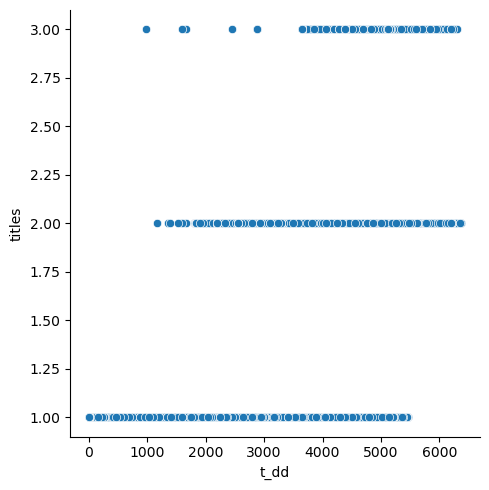

In [65]:
sns.relplot(data=emp_ttl, x=emp_ttl.t_dd, y=emp_ttl.titles)
plt.show()

In [101]:
t,p = stats.levene(emp_ttl.t_dd, emp_ttl.titles)
t,p

(625911.7433959463, 0.0)

In [103]:
t,p = stats.kruskal(emp_ttl.t_dd, emp_ttl.titles)
t,p

(171459.23051483236, 0.0)

Use the `sleepstudy` data.
- Is there a relationship between days and reaction time?

In [2]:
ss = data('sleepstudy')
ss.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [3]:
# H0 = No linear relation
# Ha = Yes linear relation
# alpha = 0.05

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


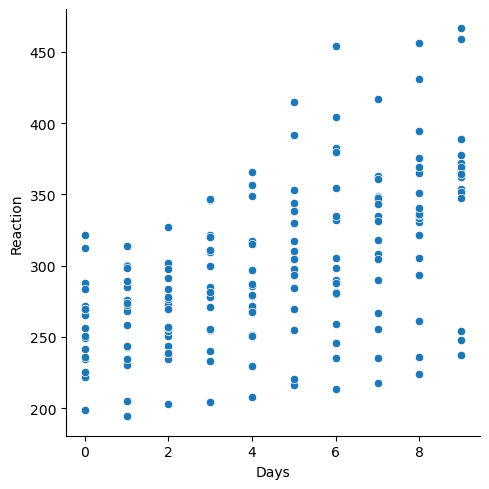

In [6]:
sns.relplot(ss.Days,ss.Reaction)
plt.show()

In [5]:
r,p = stats.spearmanr(ss.Days,ss.Reaction)
r,p

(0.5228138502259547, 5.132878057706873e-14)

## Comparison of groups

- Chi (kai) squared = $\chi^2$
- obs = `pd.crosstab(`discrete_1,discrete_2`)`
- chi2, p, free(degf), expected = `stats.chi2_contingency(`observed`)`
- expected`.astype(int)` = table if proportional and no relation

### Exercises

Answer with the type of stats test you would use (assume normal distribution):
- Do students get better test grades if they have a rubber duck on their desk?


In [ ]:
# 2-sample, 1-tail, ttest_ind

- Does smoking affect when (whether?) or not someone has lung cancer?


In [ ]:
# categories, chi2_contingency

- Is gender independent of a person’s blood type?


In [ ]:
# categories, chi2_contingency

- A farming company wants to know if a new fertilizer has improved crop yield or not


In [ ]:
# 2-sample, 1-tail, ttest_ind

- Does the length of time of the lecture correlate with a students grade?


In [ ]:
# 2-continuous, pearsonr/spearmanr

- Do people with dogs live in apartments more than people with cats?

In [ ]:
# categorical, chi2_contingency
# cat/dog,apt/no_apt

Use the following contingency table to help answer the question of whether using a Macbook and being a codeup student are independent of each other.
- cs,um = 49
- cs,nm = 1
- nc,um = 20
- nc,nm = 30

In [17]:
obs = [[49,20],
      [1,30]]
obs = pd.DataFrame(data=obs, index=['Use Mac','No Mac'], columns=['Codeup Stu','Not Codeup'])
obs

,Codeup Stu,Not Codeup
Use Mac,49,20
No Mac,1,30


In [10]:
# H0: Is independent
# Ha: Not independent
# alpha = .05

In [20]:
chi2, p, degf, exp = stats.chi2_contingency(obs)
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(obs.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(exp.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')


Observed Values

[[49 20]
 [ 1 30]]
---
Expected Values

[[34 34]
 [15 15]]
---

chi^2 = 36.6526
p     = 0.0000


In [ ]:
# reject H0

Choose another 2 categorical variables from the `mpg` dataset and perform a $\chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

In [26]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fe,auto
38,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan,21.0,auto
102,honda,civic,1.6,1999,4,manual(m5),f,25,32,r,subcompact,28.5,manual
22,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv,15.0,auto
195,toyota,corolla,1.8,1999,4,auto(l4),f,24,33,r,compact,28.5,auto
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,auto


In [27]:
# H0: Class is independent of transmission
# Ha: Class is not independent of transmission
# alpha = .05

In [30]:
obs = pd.crosstab(mpg['class'],mpg.auto)
obs

auto,auto,manual
class,,
2seater,2,3
compact,24,23
midsize,29,12
minivan,11,0
pickup,20,13
subcompact,16,19
suv,55,7


In [31]:
chi2, p, degf, exp = stats.chi2_contingency(obs)
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(obs.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(exp.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

Observed Values

[[ 2  3]
 [24 23]
 [29 12]
 [11  0]
 [20 13]
 [16 19]
 [55  7]]
---
Expected Values

[[ 3  1]
 [31 15]
 [27 13]
 [ 7  3]
 [22 10]
 [23 11]
 [41 20]]
---

chi^2 = 33.7700
p     = 0.0000


In [ ]:
# reject H0

Use the data from the `employees` database to answer these questions:


- Is an employee's `gender` independent of whether an employee works in `sales or marketing`? (only look at `current` employees)


In [34]:
emp_sm = pd.read_sql("""
select emp_no, gender, dept_name
from employees
join dept_emp using(emp_no)
join departments using(dept_no)
where to_date > now() and dept_name in ('Sales','Marketing')
""",get_db_url('employees'))
emp_sm.sample(5)

,emp_no,gender,dept_name
17099,27976,M,Sales
9082,284982,F,Marketing
40847,407080,M,Sales
49317,474269,M,Sales
30717,227151,F,Sales


In [ ]:
# H0: Gender is independent of working in Sales/Marketing
# Ha: Gender is not independent of working in Sales/Marketing
# alpha = .05

In [37]:
obs = pd.crosstab(emp_sm.gender, emp_sm.dept_name)
obs

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [38]:
chi2, p, degf, exp = stats.chi2_contingency(obs)
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(obs.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(exp.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

Observed Values

[[ 5864 14999]
 [ 8978 22702]]
---
Expected Values

[[ 5893 14969]
 [ 8948 22731]]
---

chi^2 = 0.3240
p     = 0.5692


In [ ]:
# fail to reject H0

- Is an employee's `gender` independent of whether or not they `are or have been` a `manager`?

In [36]:
emp_mgr = pd.read_sql("""
select emp_no, gender
, if(dept_no in ('d001','d002','d003','d004','d005','d006','d007','d008','d009'), 'mgr', 'emp') as mgr
from employees
left join dept_manager using(emp_no)
""",get_db_url('employees'))
emp_mgr.sample(5)

,emp_no,gender,mgr
38627,48628,M,emp
175887,275863,M,emp
1450,11451,M,emp
180302,280278,M,emp
34433,44434,M,emp


In [ ]:
# H0: Gender is independent of manager experience
# Ha: Gender is not independent of manager experience
# alpha = .05

In [39]:
obs = pd.crosstab(emp_mgr.gender,emp_mgr.mgr)
obs

mgr,emp,mgr
gender,,
F,120038,13
M,179962,11


In [40]:
chi2, p, degf, exp = stats.chi2_contingency(obs)
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(obs.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(exp.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

Observed Values

[[120038     13]
 [179962     11]]
---
Expected Values

[[120041      9]
 [179958     14]]
---

chi^2 = 1.4567
p     = 0.2275


In [ ]:
# fail to reject H0